In [2]:
using CSV, DataFrames, Dates, JSON, LinearAlgebra, Plots, PrettyTables
using Printf, Statistics, TimeSeries

In [43]:
include("SGX3000.jl");

In [49]:
C38U = load("CC3")
r = get_return("2022-03-03", "2024-03-15", C38U)
display(r)
println(get_return_diff(r))

list_dividend("2022-03-03", C38U)


StockReturn(0.016314475735053735, 0.011111111111111072)

Adj Close: buy: 1.141379 sell: 1.160000 gain: 0.018621
Dividend: 0.114000
Actual   : buy: 1.260000 sell: 1.274000 gain: 0.014000
0.46830281615484126
Day,Close,Original Close,Dividends,Adjustment Factor
2023-08-11,1.05,1.05,0.025,0.9767441860465117
2023-04-25,0.976636,0.999889238095238,0.025,0.9756071201933366
2022-08-12,1.162575,1.220015037310289,0.025,0.979919921245281
2022-04-28,1.195356,1.2801205900170551,0.039,0.9704348485687001

total_adjustment_factor: 0.9061764398541798


In [4]:
r = get_return("2022-03-03", "2024-03-15", D8DU)
get_return_diff(r)

0.8682885559820066

In [25]:
for ticker in active_tickers
    stock = load(ticker)
    r = get_return("2022-03-03", "2024-03-15", stock)
    d = get_return_diff(r)
    if !isnan(d)
        @printf "%1.6f,%s\n" get_return_diff(r) ticker
    end
end

0.143229,AWZ
-0.059612,5PO
0.000000,AAJ
0.000000,Q0F
0.000000,T6I
0.000000,E28
0.000000,HQU
0.117857,AGS
0.000000,AJ2
0.000000,N2IU
0.091879,558
0.000000,H22
0.048722,40T
0.000000,NC2
-0.389484,CJLU
0.398175,AP4
0.084417,5VS
0.000000,P15
0.000000,554
0.000679,5LY
0.011697,BEW
0.000000,5VP
-0.132168,528
0.000000,S68
0.105260,5UF
0.062240,41B
0.000000,TQ5
-0.028040,A17U
0.000000,Q0X
0.010841,5WH
0.027754,B73
0.035875,B61
0.000000,T82U
0.000000,T24
0.000000,E27
0.000000,UD1U
0.068583,570
0.000000,N32
0.059339,A7RU
0.045372,BLA
0.037340,AWX
0.000000,H30
-0.006826,5EB
0.000000,5GI
0.000000,CNE
0.000000,QC7
0.000000,P9D
0.321849,A55
0.000000,U96
0.000000,U10
0.000000,S19
0.067502,C09
0.000000,40V
0.000000,S56
0.000000,OYY
0.000000,M1GU
0.000000,S61
0.001961,5GD
0.000000,P34
0.000000,P40U
0.000000,ENV
-0.358025,544
0.000000,5AE
0.039212,C2PU
0.000000,T15
0.030989,A34
0.000000,JLB
0.000000,RQ1
0.062804,AJBU
0.000000,RXS
0.000000,EB5
0.000000,579
-0.034437,ACV
0.000000,A31
0.074134,BTOU
0.00000

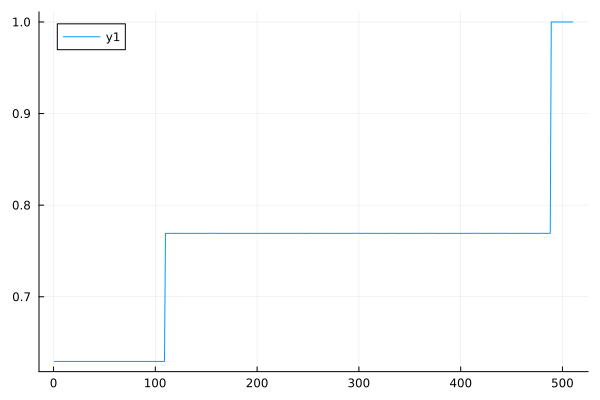

In [27]:
plot(df."Adj Close" ./ df.Close)